In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv("1995_data.csv")
data.head()

FileNotFoundError: [Errno 2] File b'complete_data.csv' does not exist: b'complete_data.csv'

In [2]:
datetmp=data.day.str.replace("/"," ")
month=datetmp.str.split(" ",expand=True)[0]
day=datetmp.str.split(" ",expand=True)[1]
year=datetmp.str.split(" ",expand=True)[2]

loctmp=data.center_point.str.replace("POINT\(","")
loctmp=loctmp.str.replace("\)","")
latitude=loctmp.str.split(" ",expand=True)[0]
longitude=loctmp.str.split(" ",expand=True)[1]

strikes=data.number_of_strikes

In [3]:
data['Year']=year.astype(float)
data['Month']=month.astype(float)
data['Day']=day.astype(float)
data['Latitude']=latitude.astype(float)
data['Longitude']=longitude.astype(float)
data['LatitudeR']=latitude.astype(float).round(0)
data['LongitudeR']=longitude.astype(float).round(0)
data['Strikes']=strikes

In [4]:
data.to_csv("1987_mod.csv", index=False, header=True) 
data.head()
# print (data.dtypes)

,day,number_of_strikes,center_point,Year,Month,Day,Latitude,Longitude,LatitudeR,LongitudeR,Strikes
0,1/1/1987,21,POINT(-80.7 26),1987.0,1.0,1.0,-80.7,26.0,-81.0,26.0,21
1,1/4/1987,23,POINT(-83.2 28.3),1987.0,1.0,4.0,-83.2,28.3,-83.0,28.0,23
2,1/5/1987,40,POINT(-78.9 31.3),1987.0,1.0,5.0,-78.9,31.3,-79.0,31.0,40
3,1/5/1987,20,POINT(-79.2 31.4),1987.0,1.0,5.0,-79.2,31.4,-79.0,31.0,20
4,1/5/1987,21,POINT(-80.1 31.4),1987.0,1.0,5.0,-80.1,31.4,-80.0,31.0,21


In [5]:
grouped_df=data.groupby('LatitudeR')
Lat=grouped_df['LatitudeR'].sum()/grouped_df['LatitudeR'].count()
Gstrikes=grouped_df['Strikes'].sum()

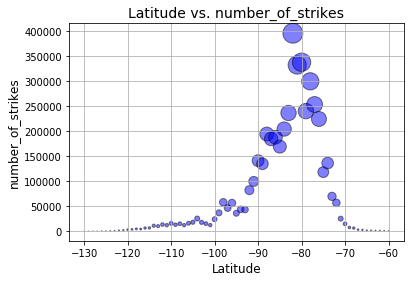

In [6]:

plt.scatter(Lat, Gstrikes, marker="o", facecolors="b", label="Suburban",edgecolors="black", s=Gstrikes/1000, alpha=0.5)
plt.title("Latitude vs. number_of_strikes",fontsize=14)
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("number_of_strikes",fontsize=12)
plt.grid()
plt.savefig("LatStrikes.png")

In [7]:
grouped_df=data.groupby('LongitudeR')
Lon=grouped_df['LongitudeR'].sum()/grouped_df['LongitudeR'].count()
Gstrikes=grouped_df['Strikes'].sum()

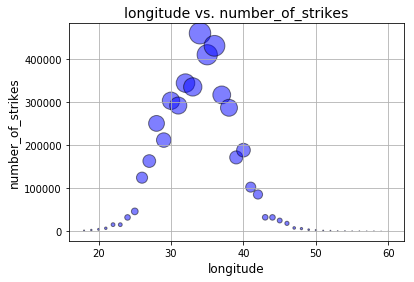

In [8]:
plt.scatter(Lon, Gstrikes, marker="o", facecolors="b", label="Suburban",edgecolors="black", s=Gstrikes/1000, alpha=0.5)
plt.title("longitude vs. number_of_strikes",fontsize=14)
plt.xlabel("longitude",fontsize=12)
plt.ylabel("number_of_strikes",fontsize=12)
plt.grid()
plt.savefig("LonStrikes.png")

In [9]:
grouped_df=data.groupby('Month')
Month=grouped_df['Month'].sum()/grouped_df['Month'].count()
Gstrikes=grouped_df['Strikes'].sum()

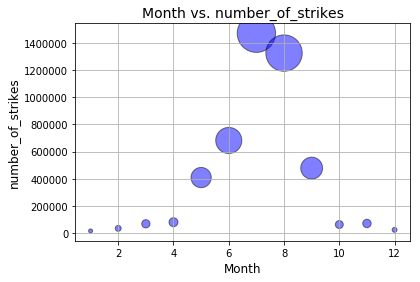

In [12]:
plt.scatter(Month, Gstrikes, marker="o", facecolors="b", label="Suburban",edgecolors="black", s=Gstrikes/1000, alpha=0.5)
plt.title("Month vs. number_of_strikes",fontsize=14)
plt.xlabel("Month",fontsize=12)
plt.ylabel("number_of_strikes",fontsize=12)
plt.grid()
plt.savefig("MonthStrikes.png")